#### 8. This question involves the use of simple linear regression on the Auto data set.
##### (a) Use the `sm.OLS()` function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:
1.  Is there a relationship between the predictor and the re- sponse?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. What is the predicted mpg associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

##### (b) Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

##### (c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.
----

#### (a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [32]:
data: pd.DataFrame = pd.read_csv("../../data/Auto.csv", na_values="?").dropna()
print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [46]:
model = sm.OLS(data.mpg, sm.add_constant(data.horsepower))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        17:18:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const         39.935861
horsepower    -0.157845
dtype: float64


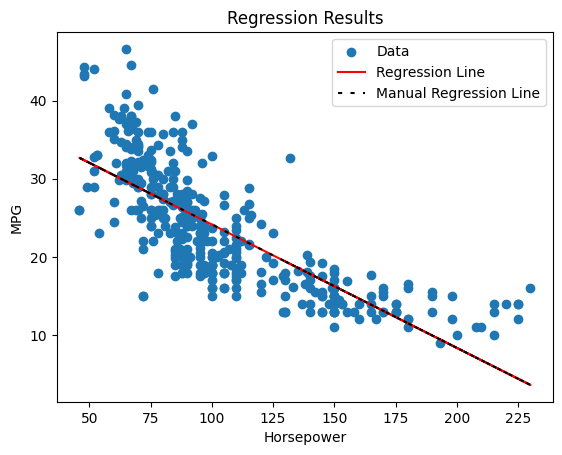

In [65]:
plt.scatter(data.horsepower, data.mpg, label='Data')
plt.plot(data.horsepower, results.fittedvalues, color='red', label='Regression Line')

print(results.params)

plt.plot(
    data.horsepower,
    results.params.const + results.params.horsepower * data.horsepower,
    label='Manual Regression Line',
    c = "black",
    dashes=[2, 4],
    ls = "--",
    zorder = 10,
)

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regression Results')
plt.legend()
plt.show()


We can see that `mpg` decreases as horsepower increases, the $R^2$ error of 0.6 indicates that a more complicated relationship would probabably be better. The std err of the constant is quite high.